In [1]:
version()

'SageMath version 9.8, Release Date: 2023-02-11'

In [2]:
%display latex
a, r = var('a r') 
lsph(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
lsph

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [3]:
qsph(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
qsph

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

r_{\rm ph}^{**} =  -0.477673658836338

r_{\rm ph}^{\rm ms} =  0.539741795874205

r_{\rm ph}^{*} =  0.658372153864346

r_- =  0.687750100080080

r_+ =  1.31224989991992

r_{\rm ph}^+ =  1.38628052846298

r_{\rm ph}^- =  3.95534731767268

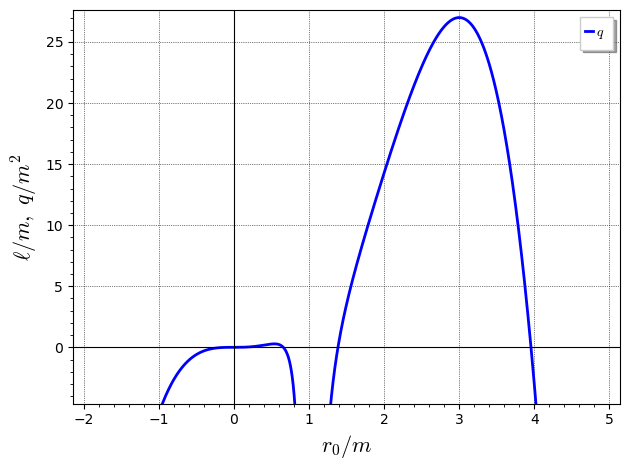

In [4]:
rp(a) = 1 + sqrt(1 - a^2)
rm(a) = 1 - sqrt(1 - a^2)
rph_ss(a) = 1/2 + cos(2/3*asin(a) + 2*pi/3)
rph_s(a) = 4*cos(acos(-a)/3 + 4*pi/3)^2
rph_p(a) = 4*cos(acos(-a)/3)^2
rph_m(a) = 4*cos(acos(a)/3)^2
rph_ms(a) = 1 - (1 - a^2)^(1/3)
rph_pol(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)))
rph_pol_in(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)) + 2*pi/3)
a0 = 0.95
show(LatexExpr(r'r_{\rm ph}^{**} = '), n(rph_ss(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm ms} = '), n(rph_ms(a0)))
show(LatexExpr(r'r_{\rm ph}^{*} = '), n(rph_s(a0)))
show(LatexExpr(r'r_- = '), n(rm(a0)))
show(LatexExpr(r'r_+ = '), n(rp(a0)))
show(LatexExpr(r'r_{\rm ph}^+ = '), n(rph_p(a0)))
show(LatexExpr(r'r_{\rm ph}^- = '), n(rph_m(a0)))
gq = plot(qsph(a0, r), (r, -2, 0.9), thickness=2, legend_label=r'$q$', 
          axes_labels=[r'$r_0/m$', r'$\ell/m,\ q/m^2$'],
          frame=True, gridlines=True) \
     + plot(qsph(a0, r), (r, 1.1, 5), thickness=2)
show(gq, ymin=-4)

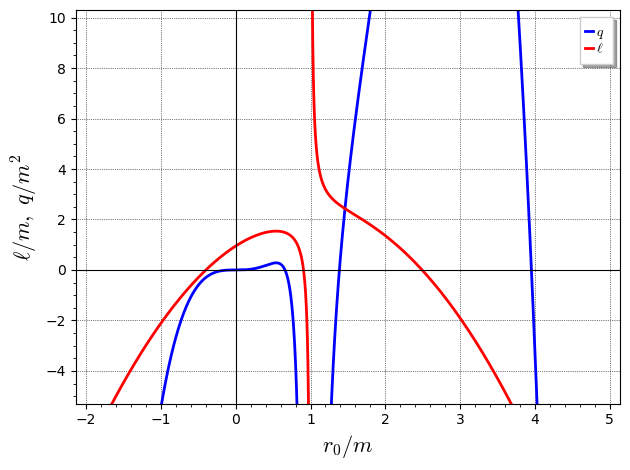

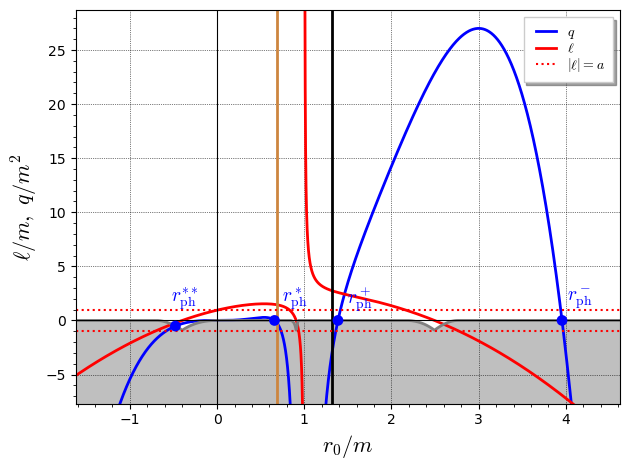

In [5]:
gl = plot(lsph(a0, r), (r, -2, 0.99), color='red', thickness=2, legend_label=r'$\ell$') \
     + plot(lsph(a0, r), (r, 1.002, 5), color='red', thickness=2)
show(gq+gl, ymin=-5, ymax=10)
def qmin(a1, r):
    l0 = abs(lsph(a1, r))
    if l0 < a1:
        return -(a1 - l0)^2
    return 0
gqmin = plot(lambda r: qmin(a0, r), (r, -2, 5), color='grey', thickness=2, fill=-8)
hor = line([(rp(a0), -10), (rp(a0), 30)], color='black', thickness=2) \
      + line([(rm(a0), -10), (rm(a0), 30)], color='peru', thickness=2)
llim = line([(-2, a0), (5, a0)], color='red', thickness=1.5, 
            linestyle=':', legend_label=r'$|\ell| = a$') \
       + line([(-2, -a0), (5, -a0)], color='red', thickness=1.5, 
              linestyle=':')
graph = gq + gl + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point((r1, qsph(a0, r1)), size=60, color='blue', zorder=100)
graph += text(r'$r_{\rm ph}^{**}$', (rph_ss(a0) + 0.1, 2), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^*$', (rph_s(a0) + 0.23, 2), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^+$', (rph_p(a0) + 0.25, 2), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^-$', (rph_m(a0) + 0.2, 2), fontsize=14, zorder=101)
graph.set_legend_options(handlelength=2)
show(graph, xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)
graph.save('gik_spher_orb_exist.pdf', xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)

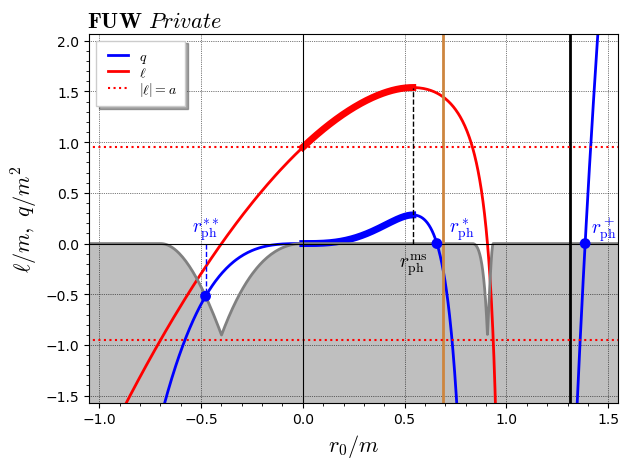

In [6]:
gq_stable = plot(qsph(a0, r), (r, 0, rph_ms(a0)), thickness=5) 
gl_stable = plot(lsph(a0, r), (r, 0, rph_ms(a0)), thickness=5, color='red') 
text_properties = {
    'fontsize': 16,
    'zorder': 101,  # Ensuring it's on top of other plot elements
}
graph = gq + gq_stable + gl + gl_stable + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point((r1, qsph(a0, r1)), size=60, color='blue', zorder=100)
graph += text(r'$r_{\rm ph}^*$', (rph_s(a0) + 0.12, 0.15), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^+$', (rph_p(a0) + 0.09, 0.15), fontsize=14, zorder=101)
r1 = rph_ss(a0)
graph += text(r'$r_{\rm ph}^{**}$', (r1, 0.15), fontsize=14, zorder=101)
graph += text(r'$\mathbf{FUW}$ $\mathit{Private}$', (-.730, 2.2),color='black', **text_properties)
graph += line([(r1, 0), (r1, qsph(a0, r1))], linestyle='--', color='blue')
r1 = rph_ms(a0)
graph += text(r'$r_{\rm ph}^{\rm ms}$', (r1, -0.2), color='black',
              fontsize=14, zorder=101)
graph += line([(r1, 0), (r1, lsph(a0, r1))], linestyle='--', color='black')
graph.set_legend_options(handlelength=2)
show(graph, xmin=-1, xmax=1.5, ymin=-1.5, ymax=2)
graph.save('gik_spher_orb_exist_zoom.pdf', xmin=-1, xmax=1.5, ymin=-1.5, ymax=2)

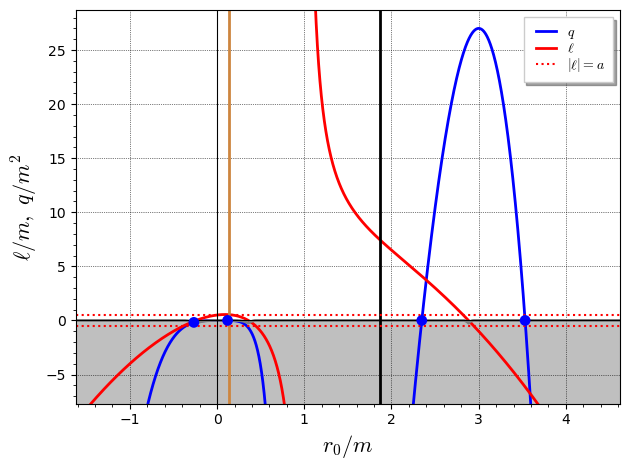

In [7]:
a0 = 0.5
gq = plot(qsph(a0, r), (r, -2, 0.9), thickness=2, legend_label=r'$q$', 
          axes_labels=[r'$r_0/m$', r'$\ell/m,\ q/m^2$'],
          frame=True, gridlines=True) \
     + plot(qsph(a0, r), (r, 1.1, 5), thickness=2)
gl = plot(lsph(a0, r), (r, -2, 0.99), color='red', thickness=2, legend_label=r'$\ell$') \
     + plot(lsph(a0, r), (r, 1.002, 5), color='red', thickness=2)
gqmin = plot(lambda r: qmin(a0, r), (r, -2, 5), color='grey', thickness=2, fill=-8)
hor = line([(rp(a0), -10), (rp(a0), 30)], color='black', thickness=2) \
      + line([(rm(a0), -10), (rm(a0), 30)], color='peru', thickness=2)
llim = line([(-2, a0), (5, a0)], color='red', thickness=1.5, 
            linestyle=':', legend_label=r'$|\ell| = a$') \
       + line([(-2, -a0), (5, -a0)], color='red', thickness=1.5, 
              linestyle=':')
graph = gq + gl + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point((r1, qsph(a0, r1)), size=60, color='blue', zorder=100)
graph.set_legend_options(handlelength=2)
show(graph, xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)

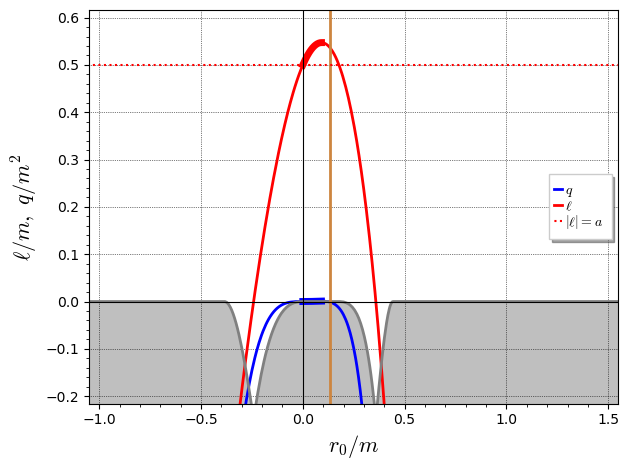

In [8]:
gq_stable = plot(qsph(a0, r), (r, 0, rph_ms(a0)), thickness=5) 
gl_stable = plot(lsph(a0, r), (r, 0, rph_ms(a0)), thickness=5, color='red') 
graph = gq + gq_stable + gl + gl_stable + gqmin + hor + llim
show(graph, xmin=-1, xmax=1.5, ymin=-0.2, ymax=0.6)

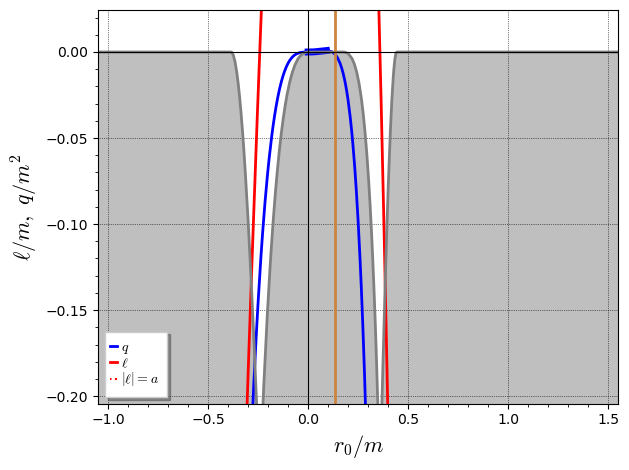

In [9]:
show(graph, xmin=-1, xmax=1.5, ymin=-0.2, ymax=0.02)

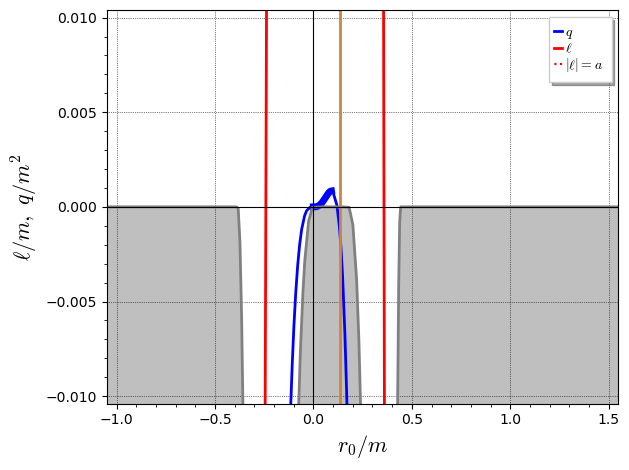

In [10]:
show(graph, xmin=-1, xmax=1.5, ymin=-0.01, ymax=0.01)

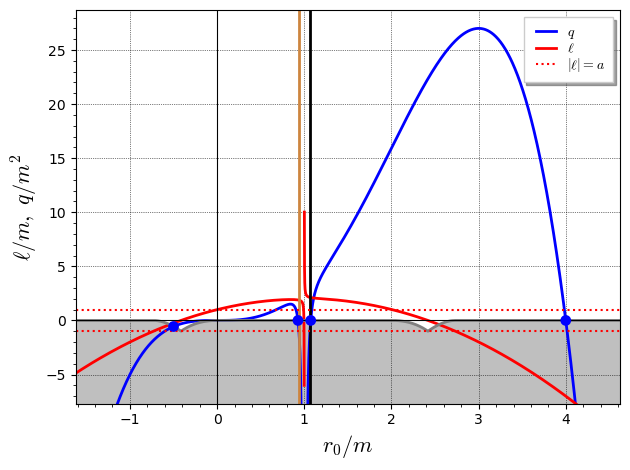

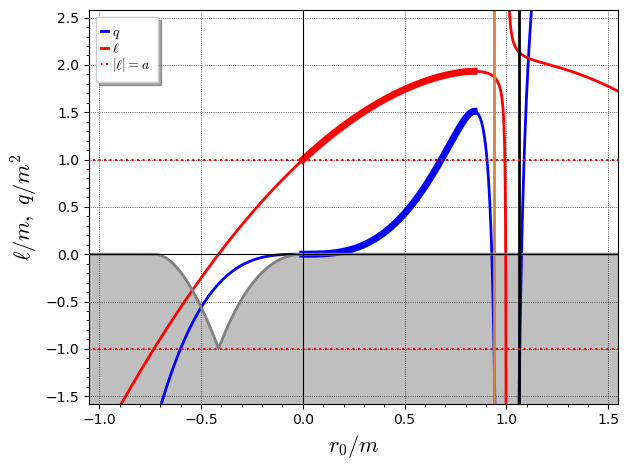

In [11]:
a0 = 0.998
gq = plot(qsph(a0, r), (r, -2, 0.999), thickness=2, legend_label=r'$q$', 
          axes_labels=[r'$r_0/m$', r'$\ell/m,\ q/m^2$'],
          frame=True, gridlines=True) \
     + plot(qsph(a0, r), (r, 1.001, 5), thickness=2)
gl = plot(lsph(a0, r), (r, -2, 0.999), color='red', thickness=2, legend_label=r'$\ell$') \
     + plot(lsph(a0, r), (r, 1.001, 5), color='red', thickness=2)
gqmin = plot(lambda r: qmin(a0, r), (r, -2, 5), color='grey', thickness=2, fill=-8)
hor = line([(rp(a0), -10), (rp(a0), 30)], color='black', thickness=2) \
      + line([(rm(a0), -10), (rm(a0), 30)], color='peru', thickness=2)
llim = line([(-2, a0), (5, a0)], color='red', thickness=1.5, 
            linestyle=':', legend_label=r'$|\ell| = a$') \
       + line([(-2, -a0), (5, -a0)], color='red', thickness=1.5, 
              linestyle=':')
graph = gq + gl + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point((r1, qsph(a0, r1)), size=60, color='blue', zorder=100)
graph.set_legend_options(handlelength=2)
show(graph, xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)
gq_stable = plot(qsph(a0, r), (r, 0, rph_ms(a0)), thickness=5) 
gl_stable = plot(lsph(a0, r), (r, 0, rph_ms(a0)), thickness=5, color='red') 
graph = gq + gq_stable + gl + gl_stable + gqmin + hor + llim
show(graph, xmin=-1, xmax=1.5, ymin=-1.5, ymax=2.5)

In [12]:
P = 2*r^3 - 3*r^2 + a^2 
P

2*r^3 + a^2 - 3*r^2

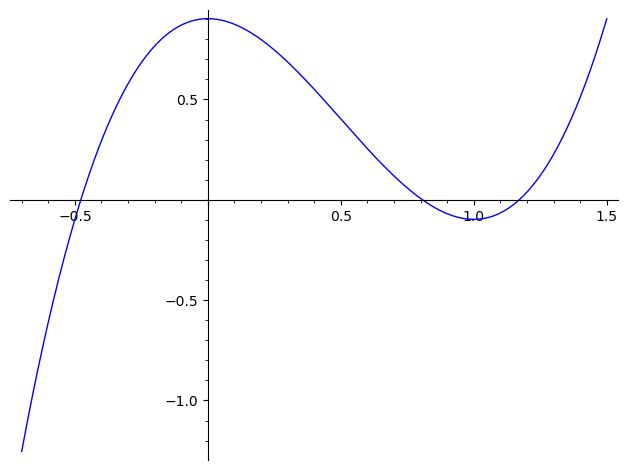

In [13]:
a0 = 0.95
plot(P.subs({a: a0}), (r, -0.7, 1.5))

In [14]:
Pdep = (P/2).subs({r: x + 1/2}).simplify_full()
Pdep

x^3 + 1/2*a^2 - 3/4*x - 1/4

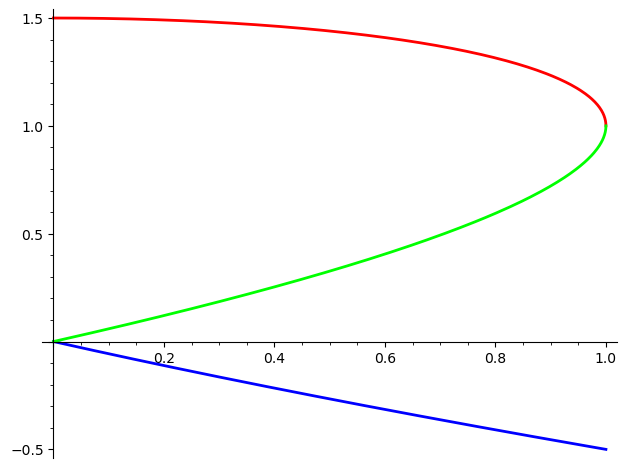

In [15]:
g = Graphics()
for k in range(3):
    rk = 1/2 + cos(2/3*asin(a) + 2*k*pi/3)
    g += plot(rk, (a, 0, 1), color=hue((3-k)/3), thickness=2)
g

In [16]:
s = Pdep.subs({x: cos(2/3*asin(a) + 2*pi/3)}) 
s
s.expand_trig().simplify_trig().reduce_trig().expand_trig()

0

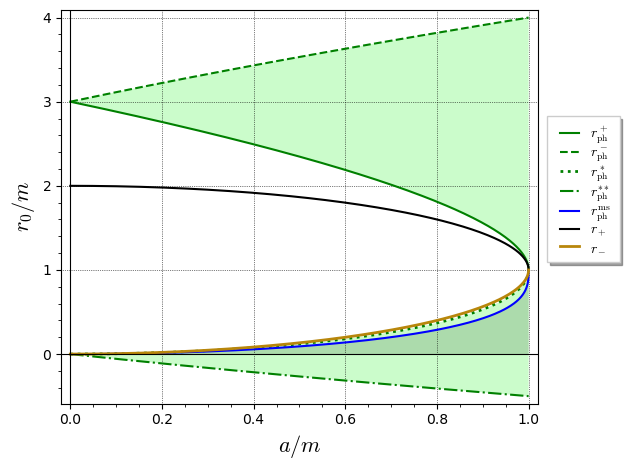

In [17]:
graph = plot(rph_p, (0, 1), axes_labels=[r'$a/m$', r'$r_0/m$'], 
             color='green', thickness=1.5, legend_label=r'$r_{\rm ph}^+$', 
             fill=rph_m, fillcolor='palegreen',
             frame=True, gridlines=True, axes=True) \
+ plot(rph_m, (0, 1), linestyle='--', color='green', thickness=1.5, 
       legend_label=r'$r_{\rm ph}^-$') \
+ plot(rph_s, (0, 1), color='green', linestyle=':', thickness=2, 
       legend_label=r'$r_{\rm ph}^*$', fill=rph_ss, fillcolor='palegreen') \
+ plot(rph_ss, (0, 1), color='green', linestyle='-.', thickness=1.5, 
       legend_label=r'$r_{\rm ph}^{**}$') \
+ plot(rph_ms, (a, 0, 1), color='blue', linestyle='-', thickness=1.5, 
       legend_label=r'$r_{\rm ph}^{\rm ms}$', fill=0, fillcolor='darkseagreen') \
+ plot(rp, (0, 1), color='black', thickness=1.5, legend_label=r'$r_+$') \
+ plot(rm, (0, 1), color='darkgoldenrod', thickness=2, legend_label=r'$r_-$') 
graph.set_legend_options(handlelength=2, loc=(1.02, 0.36))
show(graph)
graph.save('gik_spher_orb_range.pdf')

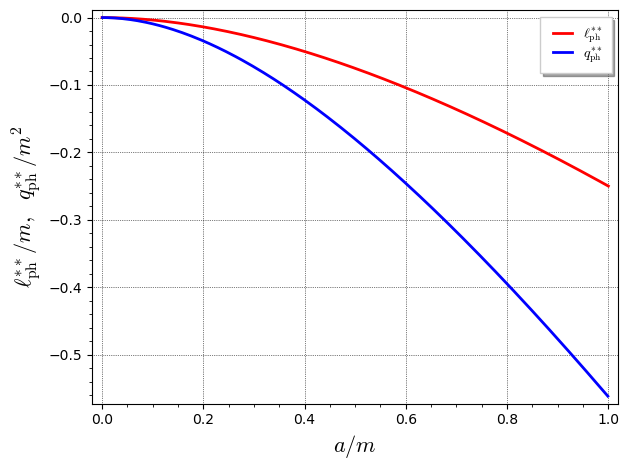

In [18]:
graph = plot(lambda a: lsph(a, rph_ss(a)), (0, 1), color='red', thickness=2, 
             legend_label=r'$\ell_{\rm ph}^{**}$',
             axes_labels=[r'$a/m$', r'$\ell_{\rm ph}^{**}/m,\ \  q_{\rm ph}^{**}/m^2$'],
             frame=True, gridlines=True, axes=False) \
        + plot(lambda a: qsph(a, rph_ss(a)), (0.001, 0.999), color='blue', thickness=2,
               legend_label=r'$q_{\rm ph}^{**}$')
graph.set_legend_options(handlelength=2)
graph.save("gik_ell_q_rss.pdf")
graph


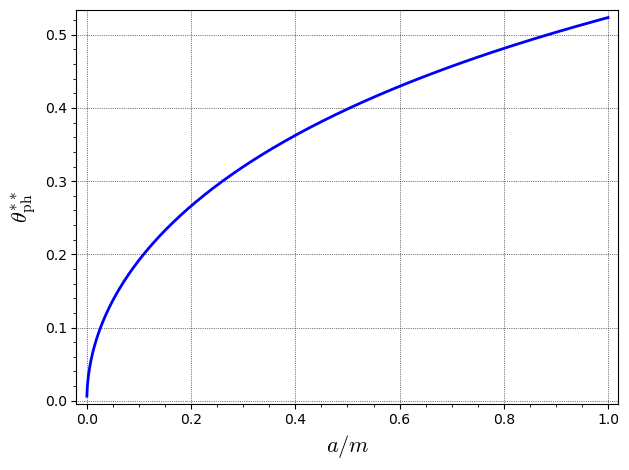

In [19]:
lsph(1, rph_ss(1))
qsph(1, rph_ss(1))
th_s = lambda a: arcsin(sqrt(abs(lsph(a, rph_ss(a)))/a))
graph = plot(th_s, (0.0001, 0.9999), color='blue', thickness=2, 
             axes_labels=[r'$a/m$', r'$\theta^{**}_{\rm ph}$'],
             frame=True, gridlines=True, axes=False)
graph.save("gik_theta_ss.pdf")
graph

In [20]:
n(pi/6)

0.523598775598299

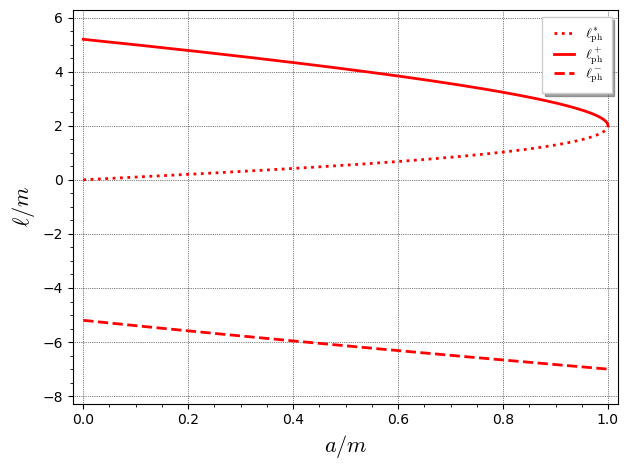

In [21]:
graph = plot(lambda a: lsph(a, rph_s(a)), (0, 1), color='red', thickness=2, 
             linestyle=':', legend_label=r'$\ell_{\rm ph}^{*}$',
             axes_labels=[r'$a/m$', r'$\ell/m$'],
             frame=True, gridlines=True, axes=False) \
        + plot(lambda a: lsph(a, rph_p(a)), (0, 1), color='red', thickness=2, 
               legend_label=r'$\ell_{\rm ph}^+$') \
        + plot(lambda a: lsph(a, rph_m(a)), (0, 1), color='red', thickness=2, 
               linestyle='--', legend_label=r'$\ell_{\rm ph}^-$')
graph.set_legend_options(handlelength=2)
graph.save("gik_ell_circ_equat.pdf", ymin=-8, ymax=6)
show(graph, ymin=-8, ymax=6)

In [22]:
l = var('l', latex_name=r'\ell')
q = var('q')
R(a, l, q, r) = r^4 + (a^2 - l^2 - q)*r^2 + 2*(q + (l - a)^2)*r - a^2*q
R

(a, l, q, r) |--> r^4 - a^2*q + (a^2 - l^2 - q)*r^2 + 2*((a - l)^2 + q)*r

In [23]:
r0 = var('r_0')

In [24]:
R0(a, r0, r) = R(a, lsph(a, r0), qsph(a, r0), r).simplify_full()
R0(a, r0, r)

(r0^6 - (2*r^2 - 8*r - 9)*r0^4 - 6*r0^5 + r^4 - 4*(a^2 + 4*r)*r0^3 + (r^4 + 8*a^2*r + 6*r^2)*r0^2 - 2*(2*a^2*r^2 + r^4)*r0)/(r0^2 - 2*r0 + 1)

In [25]:
R0(a, r0, r).factor()

(r^2*r0^2 + 2*r*r0^3 + r0^4 - 4*a^2*r0 - 2*r^2*r0 - 4*r*r0^2 - 6*r0^3 + r^2 + 2*r*r0 + 9*r0^2)*(r - r0)^2/(r0 - 1)^2

In [26]:
s = (R0(a, r0, r)*(r0 - 1)^2/(r - r0)^2).simplify_full()
s

2*(r - 3)*r0^3 + r0^4 + (r^2 - 4*r + 9)*r0^2 + r^2 - 2*(2*a^2 + r^2 - r)*r0

In [27]:
bool(s*(r - r0)^2 == R0(a, r0, r).factor().numerator())

True

In [28]:
s.collect(r)

r0^4 + (r0^2 - 2*r0 + 1)*r^2 - 4*a^2*r0 - 6*r0^3 + 2*(r0^3 - 2*r0^2 + r0)*r + 9*r0^2

In [29]:
b = r0^3 - 6*r0^2 + 9*r0 - 4*a^2
b.factor()

r0^3 - 4*a^2 - 6*r0^2 + 9*r0

In [30]:
bool(R0(a, r0, r) == (r - r0)^2*(r^2 + 2*r0*r + r0*b/(r0 - 1)^2))

True

In [31]:
bool(R0(a, r0, r) == (r - r0)^2*(r^2 + 2*r0*r - a^2/r0^2*qsph(a, r0)))


True

In [32]:
Rss(a, r) = R0(a, rph_ss(a), r)
Rs(a, r) = R0(a, rph_s(a), r)
Rp(a, r) = R0(a, rph_p(a), r)
Rm(a, r) = R0(a, rph_m(a), r)
Rms(a, r) = R0(a, rph_ms(a), r)

r_{\rm ph}^{**} = -0.477673658836338  m

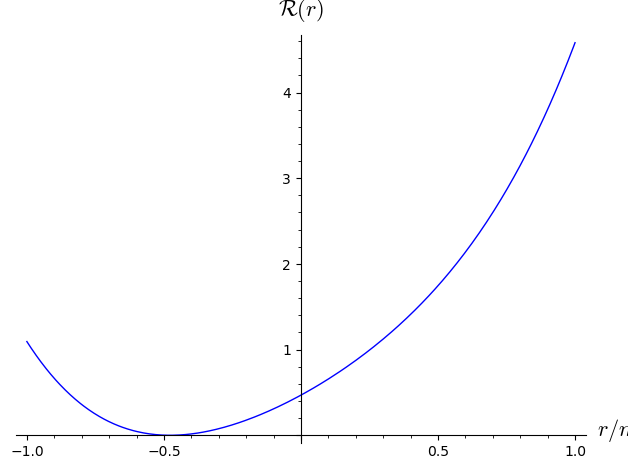

In [33]:
a0 = 0.95
# show(LatexExpr(r'r_{\rm ph}^{**} = ') + latex(n(rph_ss(a0))) + L)
show(LatexExpr(r'r_{\rm ph}^{**} = ' + '{}  m'.format(n(rph_ss(a0)))))
plot(lambda r: Rss(a0, r), (-1, 1), axes_labels=[r'$r/m$', r'$\mathcal{R}(r)$'])

In [34]:
theta0(a, l, q) = arccos(sqrt(1/2*(1 - (l^2+q)/a^2 + sqrt((1 - (l^2+q)/a^2)^2 + 4*q/a^2))))
theta0

(a, l, q) |--> arccos(sqrt(1/2*sqrt(((l^2 + q)/a^2 - 1)^2 + 4*q/a^2) - 1/2*(l^2 + q)/a^2 + 1/2))

In [35]:
theta1(a, l, q) = arccos(sqrt(1/2*(1 - (l^2+q)/a^2 - sqrt((1 - (l^2+q)/a^2)^2 + 4*q/a^2))))
theta1


(a, l, q) |--> arccos(sqrt(-1/2*sqrt(((l^2 + q)/a^2 - 1)^2 + 4*q/a^2) - 1/2*(l^2 + q)/a^2 + 1/2))

In [36]:
R2(r) = (r + sqrt(r^2 + 4))/2
R2

r |--> 1/2*r + 1/2*sqrt(r^2 + 4)

In [37]:
R = R2
th = var('th')
# We use parametric_plot() instead of arc() because of legend_label
g = parametric_plot((R(0)*sin(th), R(0)*cos(th)), 
                    (th, 0, pi), color='darkorange', thickness=3,
                    linestyle=':', legend_label=r'$r=0$',
                    axes_labels=[r'$\frac{\hat{r}}{m}\sin\theta$', 
                                 r'$\frac{\hat{r}}{m}\cos\theta$'])
g += parametric_plot((R(rm(a0))*sin(th), R(rm(a0))*cos(th)), 
                     (th, 0, pi), color='peru', thickness=3,
                     legend_label=r'$r=r_-$')
g += parametric_plot((R(rp(a0))*sin(th), R(rp(a0))*cos(th)), 
                     (th, 0, pi), color='black', thickness=3,
                     legend_label=r'$r=r_+$')

sing = point((R(0),0), size=60, color='orangered', zorder=100) # ring singularity
rminf = point((0,0), size=60, marker='o', color='white', 
              markeredgecolor='black', zorder=100)

g += sing + rminf
g.set_legend_options(handlelength=2.5, loc=(0.8, 0.8), 
                     font_size='large')


-6.26333640524599e-16
0.000000000000000
6.68118973136174e-16
0.000000000000000


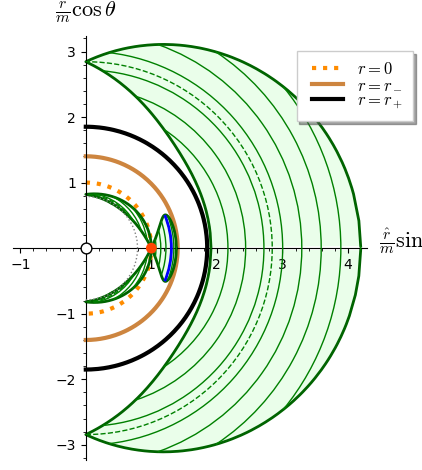

In [38]:
ns = 9
rmin, rmax = RR(1.00001*rph_p(a0)), RR(0.99999*rph_m(a0))

g += parametric_plot([R(r)*sin(theta0(a0, lsph(a0, r), qsph(a0, r))),
                      R(r)*cos(theta0(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2,
                     plot_points=200, fill=True, fillcolor='palegreen', 
                     fillalpha=0.2)
g += parametric_plot([R(r)*sin(theta0(a0, lsph(a0, r), qsph(a0, r))),
                      -R(r)*cos(theta0(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2,
                     plot_points=200, fill=True, fillcolor='palegreen',
                     fillalpha=0.2)
dr = (rmax - rmin)/(ns - 1)
for i in range(ns):
    r0 = rmin + i*dr
    l0 = lsph(a0, r0)
    q0 = qsph(a0, r0)
    th0 = theta0(a0, l0, q0)
    g += arc((0, 0), R(r0), sector=(th0 - pi/2, pi/2 - th0), 
             color='green')

rmin, rmax = RR(0), RR(rph_s(a0))
g += parametric_plot([R(r)*sin(theta0(a0, lsph(a0, r), qsph(a0, r))),
                      R(r)*cos(theta0(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2,
                     fill=True, fillcolor='palegreen', fillalpha=0.2)
g += parametric_plot([R(r)*sin(theta0(a0, lsph(a0, r), qsph(a0, r))),
                      -R(r)*cos(theta0(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2,
                     fill=True, fillcolor='palegreen', fillalpha=0.2)

# outer polar orbits:
r0 = rph_pol(a0)
print(lsph(a0, r0))
q0 = qsph(a0, r0)
th0 = 0
print(theta0(a0, 0, q0))
g += arc((0, 0), R(r0), sector=(th0 - pi/2, pi/2 - th0), 
         linestyle='--', color='green')
    
ns = 3
rmin, rmax = RR(rph_ms(a0)), 0.9999*RR(rph_s(a0))
dr = (rmax - rmin)/(ns - 1)
for i in range(ns):
    r0 = rmin + i*dr
    l0 = lsph(a0, r0)
    q0 = qsph(a0, r0)
    th0 = theta0(a0, l0, q0)
    g += arc((0, 0), R(r0), sector=(th0 - pi/2, pi/2 - th0), 
             color='green')

ns = 5
rmin, rmax = RR(0), RR(rph_ms(a0))
dr = (rmax - rmin)/(ns - 1)
for i in range(ns):
    r0 = rmin + i*dr
    l0 = lsph(a0, r0)
    q0 = qsph(a0, r0)
    th0 = theta0(a0, l0, q0)
    g += arc((0, 0), R(r0), sector=(th0 - pi/2, pi/2 - th0), 
             color='green')

r0 = rph_ms(a0)
l0 = lsph(a0, r0)
q0 = qsph(a0, r0)
th0 = theta0(a0, l0, q0)
g += arc((0, 0), R(r0), sector=(th0 - pi/2, pi/2 - th0), 
         thickness=2, color='blue', zorder=100)

    
rmin, rmax = RR(rph_ss(a0)), -1e-8

g += parametric_plot([R(r)*sin(theta0(a0, lsph(a0, r), qsph(a0, r))),
                      R(r)*cos(theta0(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2)
g += parametric_plot([R(r)*sin(theta1(a0, lsph(a0, r), qsph(a0, r))),
                      R(r)*cos(theta1(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2)
g += parametric_plot([R(r)*sin(theta0(a0, lsph(a0, r), qsph(a0, r))),
                      -R(r)*cos(theta0(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2)
g += parametric_plot([R(r)*sin(theta1(a0, lsph(a0, r), qsph(a0, r))),
                      -R(r)*cos(theta1(a0, lsph(a0, r), qsph(a0, r)))],
                     (r, rmin, rmax), color='darkgreen', thickness=2)
    
ns = 5
dr = (rmax - rmin)/(ns - 1)
for i in range(ns):
    r0 = rmin + i*dr
    l0 = lsph(a0, r0)
    q0 = qsph(a0, r0)
    th0 = theta0(a0, l0, q0)
    th1 = theta1(a0, l0, q0)
    g += arc((0, 0), R(r0), sector=(pi/2 - th1, pi/2 - th0), color='green')
    g += arc((0, 0), R(r0), sector=(th0 - pi/2, th1 - pi/2), color='green')
g += arc((0,0), R(rph_ss(a0)), sector=(- pi/2, pi/2), color='grey', 
         linestyle=':', thickness=1)

# inner polar orbits:
r0 = rph_pol_in(a0)
print(n(lsph(a0, r0)))
q0 = qsph(a0, r0)
th0 = 0
th1 = theta1(a0, 0, q0)
print(n(theta0(a0, 0, q0)))
g += arc((0, 0), R(r0), sector=(pi/2 - th1, pi/2 - th0), 
         linestyle='--', color='green')
g += arc((0, 0), R(r0), sector=(th0 - pi/2, th1 - pi/2), 
         linestyle='--', color='green')

g

In [39]:
x, y = var('x y')
Rxy = sqrt(x^2 + y^2)
r1 = Rxy - 1/Rxy
costh2 = y^2/(x^2 + y^2)
g += region_plot(r1^2 - 2*r1 + a0^2*costh2 < 0, (0, 3), (-3, 3), 
                 incol='whitesmoke', bordercol='grey')


In [ ]:
def vortical_orb(x, y):
    R0 = sqrt(x*x + y*y)
    r0 = R0 - 1/R0
    if r0 < rph_ss(a0) or r0 > 0:
        return False
    phi = atan2(y, x)
    th = pi/2 - phi
    l0 = lsph(a0, r0)
    q0 = qsph(a0, r0)
    th0 = theta0(a0, l0, q0)
    th1 = theta1(a0, l0, q0)
    if (th >= th0 and th <= th1) or (th >= pi - th1 and th <= pi - th0):
        return True
    return False

g += region_plot(vortical_orb, (0, 1), (-1, 1), incol='palegreen', alpha=0.2)

In [41]:
def stable_orb(x, y):
    R0 = sqrt(x*x + y*y)
    r0 = R0 - 1/R0
    if r0 <= 0 or r0 > rph_ms(a0):
        return False
    phi = atan2(y, x)
    th = pi/2 - phi
    l0 = lsph(a0, r0)
    q0 = qsph(a0, r0)
    th0 = theta0(a0, l0, q0)
    if th < th0 or th > pi - th0:
        return False
    return True

g += region_plot(stable_orb, (1, 1.5), (-0.7, 0.7), incol='green', alpha=0.5)

In [1]:
text_properties = {
    'fontsize': 16,
    'zorder': 101, 
}
for r1 in [rph_s(a0), rph_p(a0), rph_m(a0)]:
    g += point((R(r1), 0), size=60, color='green', zorder=100)
r1 = rph_ss(a0)
sin_th_ss = sqrt( r1/(r1 - 1)*(1 - r1^2/a0^2) )
cos_th_ss = sqrt( 1 - sin_th_ss^2 ) 
g += point((R(r1)*sin_th_ss, R(r1)*cos_th_ss), size=60, color='green', zorder=100)
g += point((R(r1)*sin_th_ss, -R(r1)*cos_th_ss), size=60, color='green', zorder=100)
g += text(r'$\mathbf{FUW}$ $\mathit{Private}$', (1.5, 3.4),color='black', **text_properties)
show(g, xmin=0, xmax=4.5, ticks=[1, 1], figsize=8)
g.save("gik_spo_meridional.pdf", xmin=0, xmax=4.5, ticks=[1, 1], figsize=8)

NameError: name 'rph_s' is not defined

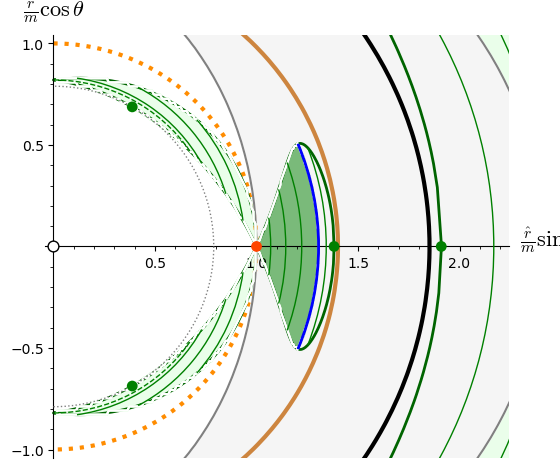

In [43]:
show(g, xmin=0, xmax=2.2, ymin=-1, ymax=1, show_legend=False)
g.save("gik_spo_meridional_zoom.pdf", xmin=0, xmax=2.2, ymin=-1, ymax=1, 
       show_legend=False)

In [19]:
MP = M.open_subset('MP', latex_name=r'\mathscr{M}_{\rm P}', 
                   coord_def={X_conf: [cos(ta) - sin(ch)*sin(th)*cos(ph)>0, ta>-pi, ta<pi]})
print(MP)
MP

Open subset MP of the 4-dimensional Lorentzian manifold M


Open subset MP of the 4-dimensional Lorentzian manifold M

In [20]:
f = (e^x-1)/(1+e^(x/2))
f.canonicalize_radical()

e^(1/2*x) - 1

In [21]:
a = SR.symbol('a')
f = (log(x+x^2)-log(x))^a/log(1+x)^(a/2)
f.canonicalize_radical()

log(x + 1)^(1/2*a)

In [26]:
phi0 = var('phi0', latex_name=r'\phi_0')
sigma = var('sigma', latex_name=r'\sigma')
pi = var('pi', latex_name=r'\pi')
phi = var('phi', latex_name=r'\phi')
mu = var('mu', latex_name=r'\mu')
coupling = var('coupling', latex_name=r'\lambda')
mu =sqrt(coupling/3)*phi0
phi = phi0 + sqrt(1/2)*(sigma +I*pi)
assume(sigma, 'real')
assume(pi, 'real')


V = (-1)*mu^2 * conjugate(phi)*phi + coupling/6 * (conjugate(phi)*phi)^2
print("------the full expression-------")
show(V.canonicalize_radical().expand())
print("------mu-------")
show(mu)
print("------phi-------")
show(phi)
print("------V-------")
show(factor(V.canonicalize_radical()))


#V_expanded = factor(V.canonicalize_radical().expand().collect(coupling))
#show(V_expanded)
#V_together = together(V_expanded)
#V_cancelled = cancel(V_together)
#V_simplified = V_cancelled.simplify_radical()
#V_factorized = factor(V_simplified)
#V_manipulated = factor(cancel(together(collect(V_expanded, coupling))).simplify_radical())
#show(V_manipulated)

------the full expression-------


1/6*sqrt(2)*coupling*phi0*pi^2*sigma + 1/6*sqrt(2)*coupling*phi0*sigma^3 - 1/6*coupling*phi0^4 + 1/24*coupling*pi^4 + 1/3*coupling*phi0^2*sigma^2 + 1/12*coupling*pi^2*sigma^2 + 1/24*coupling*sigma^4

------mu-------


sqrt(1/3)*sqrt(coupling)*phi0

------phi-------


sqrt(1/2)*(I*pi + sigma) + phi0

------V-------


1/24*(4*sqrt(2)*phi0*pi^2*sigma + 4*sqrt(2)*phi0*sigma^3 - 4*phi0^4 + pi^4 + 8*phi0^2*sigma^2 + 2*pi^2*sigma^2 + sigma^4)*coupling